# **STAT-201 Project Proposal**
## Analysis of data science salaries

Prabh Sehgal, Rainie Fu, Rishabh Mathur, Dennis Truong

## Introduction
A key factor in employee happiness is financial compensation, and past work during the COVID-19 pandemic have shown that working remotely can also have a positive impact on happiness thanks to increased employee autonomy. (Card et al., 2012; Galanti et al., 2021). Our analysis aims to explore the relationships between different data science jobs, their salaries, and their proportions doing remote work. Our analyses can inform prospective emplyees about each position's remote work flexibility and typical salary. Employees may use these inferences to discover new data science occupations that better align with their work-life goals.

### Research Question

If full-time Data Scientists and Data Analysts were compared, is there a difference in the means of salaries and difference in proportions of remote work?


### Dataset

Our research utilizes the dataset "Data Science Job Salaries" by Ruchi Bhatia (2022) from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). Observations include the year the salary was paid, experience level, work kind, title, salary, remote ratio, firm size, and company location. The main observations we aim to use are the ```job_title``` to tell us the job type, the ```salary_in_USD``` to inform us about each role's salary, and the ```remote_ratio``` to give us the proportion of poeple working remotely in that respective role.


## Preliminary Results

### Exploring our Data

We downloaded the data to our repository and read it from there since Kaggle does not let datasets to be read straight from the website.

In [27]:
library(tidyverse)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(GGally)
library(scales)
library(gridExtra)

set.seed(4204)

# load the url where the dataset is at 
url <- "https://raw.githubusercontent.com/vindennt/stat-201-project-group-10/main/ds_salaries.csv"

#use suppressMessages() to avoid the warning message when it automatically gives a
#name to the first column, which is just indecies
salaries <- suppressMessages(
read_delim(url, delim = ",") %>%
select(!...1))

# get a preview of the dataset
head(salaries)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [34]:
# Since we are only interested in the salaries for full time positions as that
# of part time positions can vary from various factors. We filter them out.

# We might be using CLT for our hypothesis testing later, so let's see which job title
# contains large enough sample size (we use n > 30 as large as discussed in class).
salaries <- salaries %>%
    filter(employment_type == "FT") %>%
    group_by(job_title) %>%
    mutate(n = n()) %>%
    filter(n > 30)


# Now that we have potential job titles to work with, let's only gather the information
# we are interested in about these four titles:
# 1. salaries in usd (so that the salaries are compareable)
# 2. remote ratio, change the numerical values into "in person" (if 0), "hybrid" (if 50), "remote" (if 100)


inperson <- salaries %>%
    filter(remote_ratio == 0) %>%
    mutate(remote_ratio = "in person")
hybrid <- salaries %>%
    filter(remote_ratio == 50) %>%
    mutate(remote_ratio = "hybrid")
remote <- salaries %>%
    filter(remote_ratio == 100) %>%
    mutate(remote_ratio = "remote")
salaries_new <- rbind(inperson, hybrid, remote) %>%
    select(-salary_currency, -salary, -employee_residence, -company_location, -employment_type)

head(salaries_new)

work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,n
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
2020,MI,Data Scientist,79833,in person,L,140
2020,EN,Data Scientist,51321,in person,S,140
2020,MI,Data Scientist,40481,in person,L,140
2020,EN,Data Scientist,39916,in person,M,140
2020,MI,Machine Learning Engineer,43331,in person,M,41
2020,SE,Data Engineer,33511,in person,S,129


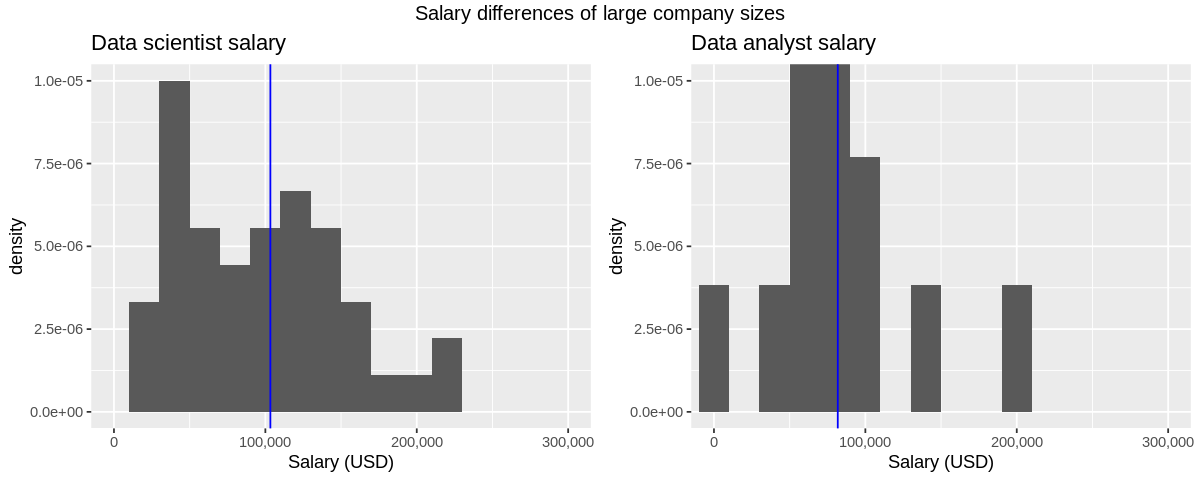

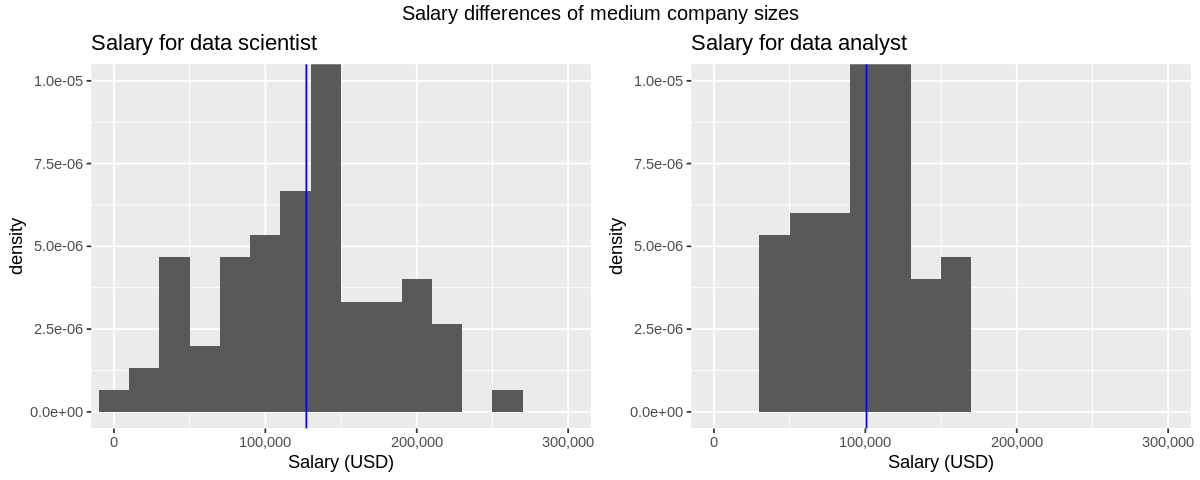

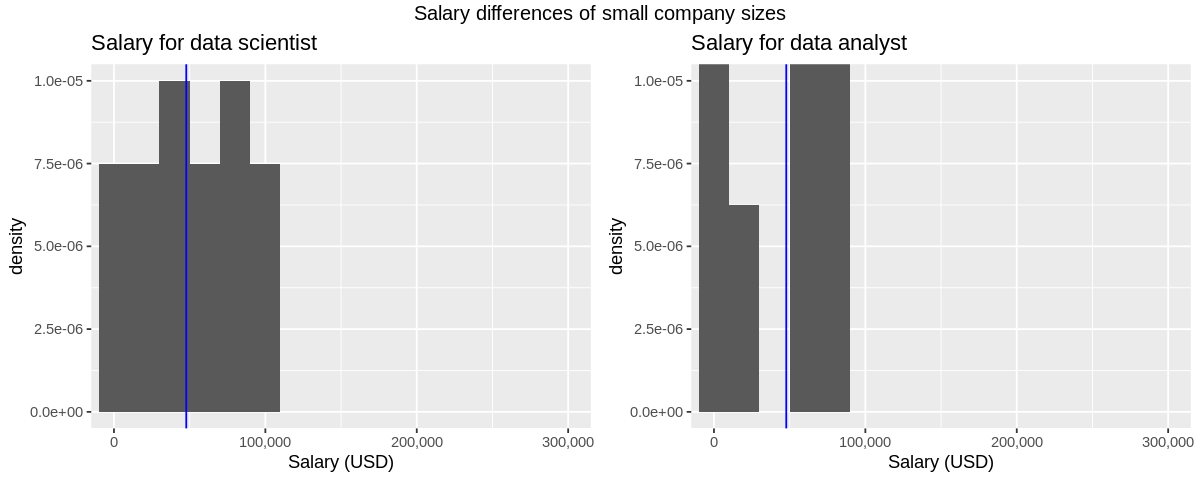

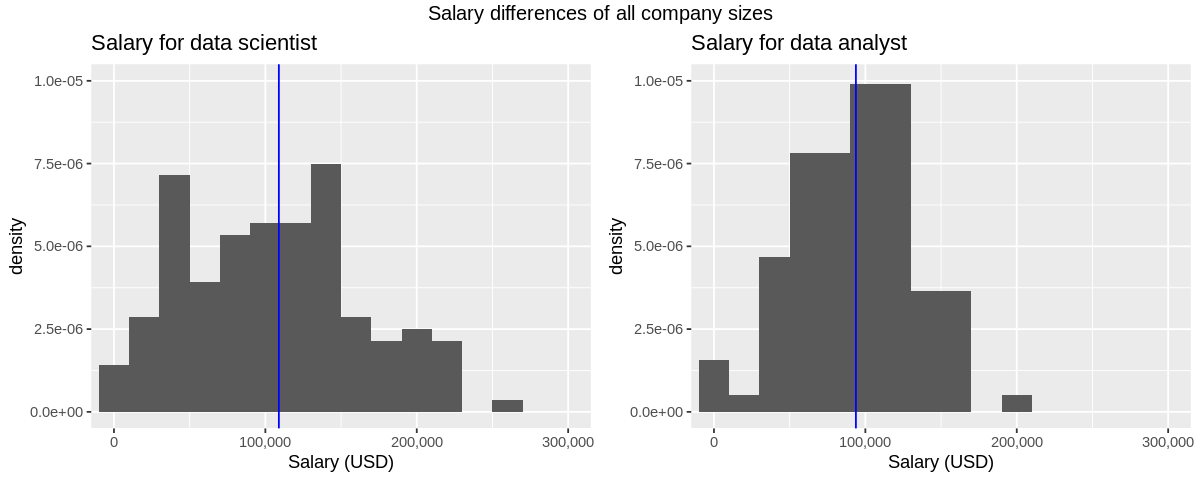

In [14]:

options(repr.plot.width = 10, repr.plot.height = 4)

salaries_ds_large <- salaries_new %>%
    filter(company_size == "L") %>%
    filter(job_title == "Data Scientist")

ds_salary_dist <- salaries_ds_large %>% # data scientist salary distribution for large companies
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(salaries_ds_large$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Data scientist salary") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

salaries_pda_large <- salaries_new %>%
    filter(company_size == "L") %>%
    filter(job_title == "Data Analyst")

pda_salary_dist <- salaries_pda_large %>% # data analyst salary distribution for large companies
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(salaries_pda_large$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Data analyst salary") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

grid.arrange(ds_salary_dist, pda_salary_dist, ncol = 2, top = "Salary differences of large company sizes")

#======#======#======#======#======#======#======#======#======#======#======#======#======#======#======#======

salaries_ds_medium <- salaries_new %>%
    filter(company_size == "M") %>%
    filter(job_title == "Data Scientist")

ds_salary_dist <- salaries_ds_medium %>% # data analyst distribution
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(salaries_ds_medium$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Salary for data scientist") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

salaries_pda_medium <- salaries_new %>%
    filter(company_size == "M") %>%
    filter(job_title == "Data Analyst")

pda_salary_dist <- salaries_pda_medium %>% # data analyst distribution
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(salaries_pda_medium$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Salary for data analyst") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

grid.arrange(ds_salary_dist, pda_salary_dist, ncol = 2, top = "Salary differences of medium company sizes")

#======#======#======#======#======#======#======#======#======#======#======#======#======#======#======#======

salaries_ds_small <- salaries_new %>%
    filter(company_size == "S") %>%
    filter(job_title == "Data Scientist")

ds_salary_dist <- salaries_ds_small %>% # data analyst distribution
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(salaries_pda_small$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Salary for data scientist") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

salaries_pda_small <- salaries_new %>%
    filter(company_size == "S") %>%
    filter(job_title == "Data Analyst")

pda_salary_dist <- salaries_pda_small %>% # data analyst distribution
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(salaries_pda_small$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Salary for data analyst") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

grid.arrange(ds_salary_dist, pda_salary_dist, ncol = 2, top = "Salary differences of small company sizes")

#======#======#======#======#======#======#======#======#======#======#======#======#======#======#======#======
# since we can see that 


ds_salary_dist <- salaries_new %>% # data analyst distribution
    filter(job_title == "Data Scientist") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(filter(salaries_new, job_title == "Data Scientist")$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Salary for data scientist") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

pda_salary_dist <- salaries_new %>% # data analyst distribution
    filter(job_title == "Data Analyst") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 20000) +
    geom_vline(xintercept = mean(filter(salaries_new, job_title == "Data Analyst")$salary_in_usd),
              color = "blue") +
    labs(x = "Salary (USD)", title = "Salary for data analyst") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 300000), ylim = c(0, 1e-05)) # same width x-axes

grid.arrange(ds_salary_dist, pda_salary_dist, ncol = 2, top = "Salary differences of all company sizes")

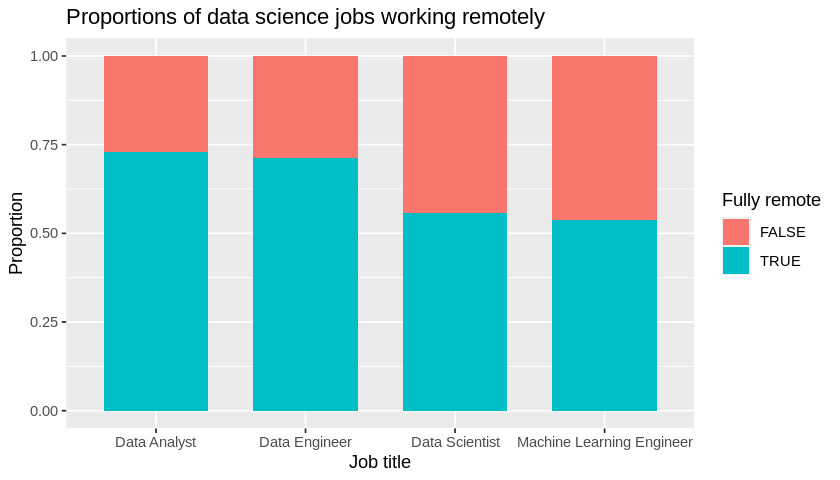

In [ ]:
# We also want to visualize data for the proportions of remote work employees, and we only consider remote workers as those who work fully remotely 

options(repr.plot.width = 7, repr.plot.height = 4)

remote_prop_visual <- salaries_new %>%
    filter(job_title == "Data Analyst" || job_title = "Data Scientist") %>%
    ggplot(aes(x = job_title, fill = remote_ratio == "remote")) +
    geom_bar(position = "fill", width = 0.7) +
    xlab("Job title") +
    ylab("Proportion") +
    ggtitle("Proportions of data science jobs working remotely") +
    labs(fill = "Fully remote")

remote_prop_visual

# Estimates

In [57]:
# Here, we will calcualte basic point estimate statistics for future inferences.

data_estimates <- salaries_new %>%
    group_by(job_title) %>%
    summarize(n = n(),
              salary_mean = mean(salary_in_usd), 
              salary_sd = sd(salary_in_usd), 
              remote_prop = mean(remote_ratio == "remote"), 
              remote_sd = sqrt(remote_prop * (1 - remote_prop)))

head(data_estimates)

job_title,n,salary_mean,salary_sd,remote_prop,remote_sd
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Data Analyst,96,93752.84,39258.60,0.7291667,0.4443902
Data Engineer,129,114224.82,57349.85,0.7131783,0.4522776
Data Scientist,140,108922.79,64372.43,0.5571429,0.4967240
Machine Learning Engineer,41,104880.15,63218.63,0.5365854,0.4986597


# Methods

Up till now, the report has demonstrated differences in mean salaries and proportions of remote work among Data Scientists and Data Analysts. To ensure randomness, representative samples of full-time employees with sample sizes greater than 30 were used.
However, relying on point estimates and plots alone is not enough to establish these differences. Therefore, to address this issue, the report proposes using the Central Limit Theorem, as the samples are roughly normally distributed and less computationally intensive than resampling methods.
By letting Data Scientists be population 1, and Data Analysts as population 2, we aim to test the following hypothesis for the mean salary:
$$H_0 : \mu_2 - \mu_1 = 0$$
$$H_1 : \mu_2 - \mu_1 \neq 0$$

for the proportion of remote work:
$$H_0 : p_2 - p_1 = 0$$
$$H_1 : p_2 - p_1 \neq 0$$

where $\mu$ is the population's mean salary and $p$ is its proportion of employees working remotely. 

We expect to reject both null hypotheses, and will include a 90% confidence interval in our final report.

### Impact

The outcomes of these findings could affect the decisions of newly graduated data scientists in terms of which job positions to seek and which career paths to focus on during their undergraduate studies.

### Future

This prompts further questions about how differences in experience, company location, and company size may affect the comparison of job titles in the field of Data Science. Additionally, with more data, these issues can be explored for the other professions that were not thoroughly examined due to limitations in sample size and distribution.

# References

Bhatia, R. (2022). *Data science job salaries*. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Card, D., Mas, A., Moretti, E., & Saez, E. (2012). Inequality at work: The effect of peer salaries on job satisfaction. *American Economic Review*, 102(6), 2981–3003. https://doi.org/10.1257/aer.102.6.2981

Galanti, T., Guidetti, G., Mazzei, E., Zappalà, S., & Toscano, F. (2021). Work from home during the COVID-19 outbreak: the impact on employees' remote work productivity, engagement, and stress. *Journal of Occupational and Environmental Medicine*, 63(7), e426–e432. https://doi.org/10.1097/JOM.0000000000002236